In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2581 - accuracy: 0.9247
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1054 - accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0743 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0538 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0408 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0327 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0263 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0195 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.013

In [6]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model/assets


In [7]:
model = tf.keras.models.load_model('handwritten.model/')

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.9757
0.11219208687543869
0.9757000207901001


This digit is probably a 2


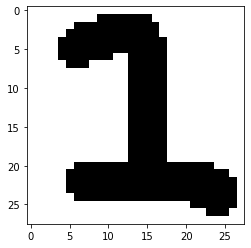

This digit is probably a 2


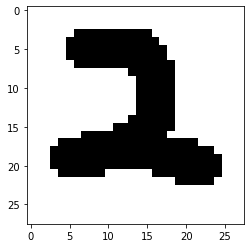

This digit is probably a 3


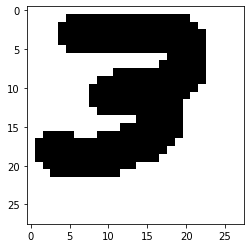

This digit is probably a 8


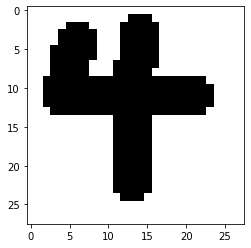

This digit is probably a 6


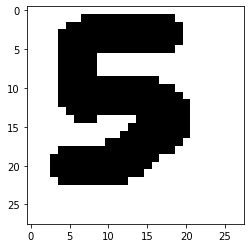

This digit is probably a 6


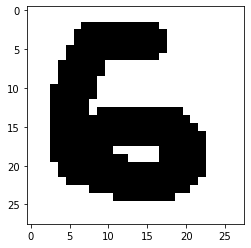

This digit is probably a 8


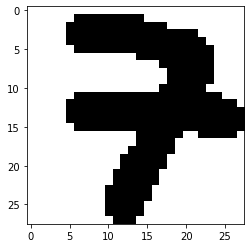

This digit is probably a 8


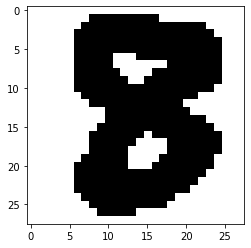

This digit is probably a 1


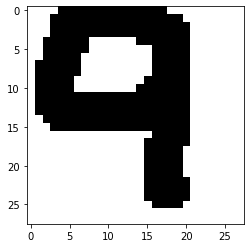

This digit is probably a 0


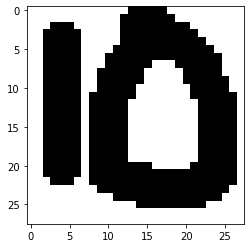

In [9]:
image_number = 1
while os.path.isfile(f"Handwritten_images/image{image_number}.png"):
    try:
        image = cv2.imread(f"Handwritten_images/image{image_number}.png")[:,:,0]
        image = np.invert(np.array([image]))
        prediction = model.predict(image)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(image[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print('Error!')
    finally:
        image_number += 1